### Data set description Link (Tennis ATP sample records of tour matches played in the season 2018-19)

https://studydaddy.com/attachment/167533/STAT+1.docx

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('tennis.csv')

In [4]:
df.head(100)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,NaN,A,20181231,243,106034,NaN,NaN,...,37.0,28.0,14.0,11.0,5.0,8.0,185.0,275.0,136.0,421.0
1,2019-M020,Brisbane,Hard,NaN,A,20181231,244,117360,NaN,NaN,...,65.0,49.0,23.0,16.0,4.0,7.0,166.0,318.0,99.0,590.0
2,2019-M020,Brisbane,Hard,NaN,A,20181231,245,106423,NaN,NaN,...,44.0,31.0,7.0,9.0,5.0,7.0,146.0,367.0,119.0,482.0
3,2019-M020,Brisbane,Hard,NaN,A,20181231,246,106426,3.0,NaN,...,33.0,28.0,9.0,10.0,2.0,4.0,84.0,650.0,NaN,NaN
4,2019-M020,Brisbane,Hard,NaN,A,20181231,247,200175,7.0,NaN,...,21.0,12.0,7.0,7.0,3.0,8.0,131.0,433.0,297.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-9152,Orlando CH,Hard,NaN,C,20181231,274,200589,NaN,WC,...,NaN,NaN,NaN,NaN,NaN,NaN,664.0,1.0,243.0,198.0
96,2019-9152,Orlando CH,Hard,NaN,C,20181231,275,106288,14.0,NaN,...,52.0,36.0,17.0,14.0,2.0,6.0,265.0,158.0,285.0,135.0
97,2019-9152,Orlando CH,Hard,NaN,C,20181231,276,106261,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,257.0,168.0,400.0,33.0
98,2019-9152,Orlando CH,Hard,NaN,C,20181231,277,106218,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,308.0,103.0,250.0,183.0


In [7]:
df.drop(df[df.winner_hand == 'U'].index, axis = 0, inplace = True)
df.drop(df[df.loser_hand == 'U'].index, axis = 0, inplace = True)

In [8]:
dff = df.loc[:,['winner_hand', 'loser_hand']]

In [9]:
dff

,winner_hand,loser_hand
0,R,R
2,R,R
4,R,R
5,R,L
7,R,L
...,...,...
1531,R,R
1532,R,R
1533,R,R
1534,R,R


In [13]:
a = dff['winner_hand'] == 'R'
b = dff['loser_hand']  == 'L'
c = a == b
d = dff[c]
d

,winner_hand,loser_hand
5,R,L
7,R,L
11,L,R
23,L,R
25,L,R
...,...,...
1514,L,R
1515,R,L
1517,L,R
1525,R,L


In [14]:
d['success'] = d['winner_hand'].replace({'R' : 'success' , 'L' : 'Failure'})


<ipython-input-14-a1e229537a82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['success'] = d['winner_hand'].replace({'R' : 'success' , 'L' : 'Failure'})


In [15]:
d.head()

,winner_hand,loser_hand,success
5,R,L,success
7,R,L,success
11,L,R,Failure
23,L,R,Failure
25,L,R,Failure


In [16]:
d['success'].value_counts()

Failure    120
success    109
Name: success, dtype: int64

In [17]:
ctab = pd.DataFrame({'Right' : [sum(df.winner_hand == 'R'), sum(df.loser_hand == 'R')],
                     'Left' : [sum(df.winner_hand == 'L'), sum(df.loser_hand == 'L')]}, index = ['winners', 'losers'])

In [18]:
ctab

,Right,Left
winners,774,133
losers,784,122


In [19]:
ctab.sum()

Right    1558
Left      255
dtype: int64

p(w|R) = P(w and R)/P(R)

In [20]:
p =  (ctab.iloc[0,0]/ctab.sum().sum())/(ctab.sum()[0]/ctab.sum().sum())
print(p)

0.49679075738125805


In [21]:
d.shape

(229, 3)

In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt

k = np.arange(0,229, 1)
k.sort()
n = 229
binomial = stats.binom.pmf(k,n,p)


Text(0, 0.5, 'Probability of Successes')

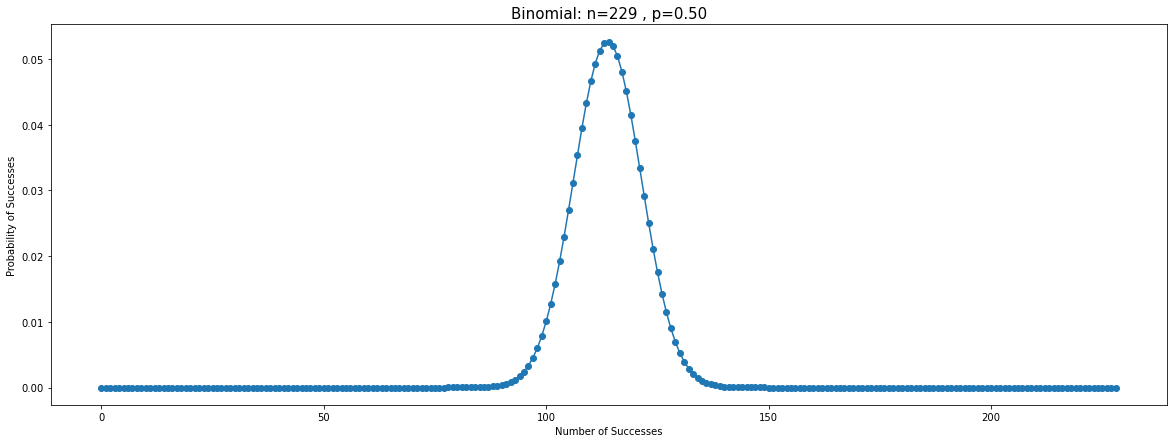

In [23]:
plt.figure(figsize=(20,7))
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
